<a href="https://colab.research.google.com/github/AkerkeKesha/stacked-unets/blob/main/gcolab_spacenet6_semantic_segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Set up plotting options
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
gdrive_root = '/content/drive/MyDrive/stacked-unet/dataset/data-spacenet6'
gdrive_root

'/content/drive/MyDrive/stacked-unet/dataset/data-spacenet6'

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
from psutil import virtual_memory
ram_gb = virtual_memory().total / 1e9
print('Your runtime has {:.1f} gigabytes of available RAM\n'.format(ram_gb))

if ram_gb < 20:
  print('Not using a high-RAM runtime')
else:
  print('You are using a high-RAM runtime!')

Your runtime has 54.8 gigabytes of available RAM

You are using a high-RAM runtime!


In [5]:
!git clone https://github.com/AkerkeKesha/stacked-unets.git

Cloning into 'stacked-unets'...
remote: Enumerating objects: 1170, done.
remote: Counting objects: 100% (290/290), done.
remote: Compressing objects: 100% (184/184), done.
remote: Total 1170 (delta 184), reused 203 (delta 105), pack-reused 880
Receiving objects: 100% (1170/1170), 6.48 MiB | 16.37 MiB/s, done.
Resolving deltas: 100% (788/788), done.


In [6]:
%cd stacked-unets

/content/stacked-unets


In [7]:
%pip install -r requirements.txt

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.7/106.7 kB 3.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.3/21.3 MB 52.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.9/121.9 kB 15.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 7.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 84.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 295.0/295.0 kB 36.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 86.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 93.4/93.4 kB 12.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 85.9 MB/s eta 0:00:00
  Created wheel for efficientnet-pytorch: filename=efficientnet_pytorch-0.7.1-py3-none-any.whl size=16428 sha256=9b16fdaae48537a355b91d7da6040848feb1a33a01ac153429e14388cb6aa6dc
  Stored in direct

In [8]:
!mkdir -p /content/stacked-unets/dataset/data-spacenet6

!tar -xzf $gdrive_root/SN6_buildings_AOI_11_Rotterdam_train.tar.gz -C /content/stacked-unets/dataset/data-spacenet6

In [9]:
%pwd

'/content/stacked-unets'

In [10]:
!mkdir -p dataset/data-spacenet6/train/AOI_11_Rotterdam
!mv dataset/data-spacenet6/SAR-Intensity dataset/data-spacenet6/train/AOI_11_Rotterdam/
!mv dataset/data-spacenet6/SummaryData dataset/data-spacenet6/train/AOI_11_Rotterdam/
!mv dataset/data-spacenet6/masks dataset/data-spacenet6/train/AOI_11_Rotterdam/
!mv dataset/data-spacenet6/geojson_buildings dataset/data-spacenet6/train/AOI_11_Rotterdam/

# Couple check ups

In [11]:
%pwd

'/content/stacked-unets'

In [ ]:
!git fetch

remote: Enumerating objects: 7, done.
remote: Counting objects: 100% (7/7), done.
remote: Compressing objects: 100% (1/1), done.
remote: Total 4 (delta 3), reused 4 (delta 3), pack-reused 0
Unpacking objects: 100% (4/4), 501 bytes | 501.00 KiB/s, done.
From https://github.com/AkerkeKesha/stacked-unets
   3895877..ba778fc  main       -> origin/main


In [ ]:
!git pull

Updating 3895877..ba778fc
Fast-forward
 src/dataset.py | 12 +++++++-----
 1 file changed, 7 insertions(+), 5 deletions(-)


In [8]:
!git stash

fatal: not a git repository (or any of the parent directories): .git


In [12]:
import torch
if torch.cuda.is_available():
    device = torch.device("cuda")
    print("GPU is available")
else:
    device = torch.device("cpu")
    print("GPU is not available, using CPU instead")

GPU is available


In [3]:
import sys
print(sys.path)

['/content', '/env/python', '/usr/lib/python310.zip', '/usr/lib/python3.10', '/usr/lib/python3.10/lib-dynload', '', '/usr/local/lib/python3.10/dist-packages', '/usr/lib/python3/dist-packages', '/usr/local/lib/python3.10/dist-packages/IPython/extensions', '/root/.ipython']


In [13]:
import sys

sys.path.append('/content/stacked-unets/src')

In [14]:
import os

os.environ['ENVIRONMENT'] = 'colab'
os.environ['DATASET'] = 'sn6'
os.environ['STOP'] = 'no'

In [15]:
import os
from glob import glob
import config

print(f"Is colab: {config.environment}")
print(f"Is colab: {config.dataset}")
print(f"Training dir: {config.train_dir}")
print(f"{config.stop}")
print(f"{config.batch_size}")

Is colab: colab
Is colab: sn6
Training dir: /content/stacked-unets/dataset/data-spacenet6/train/AOI_11_Rotterdam
no
16


Split into train:(2522, 4), validation:(315, 4), and test:(316, 4)
Level: [1 / 1]


  0%|          | 0/158 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/158 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/158 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/158 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/158 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/158 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/158 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/158 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/158 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/158 [00:00<?, ?it/s]

Epoch: [10 / 20]
Train mean IoU = 0.5113
Train mean loss = 0.2073


  0%|          | 0/20 [00:00<?, ?it/s]

Val mean IoU = 0.5195
Val mean loss = 0.2180


  0%|          | 0/158 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/158 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/158 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/158 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/158 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/158 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/158 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/158 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/158 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/158 [00:00<?, ?it/s]

Epoch: [20 / 20]
Train mean IoU = 0.5455
Train mean loss = 0.1869


  0%|          | 0/20 [00:00<?, ?it/s]

Val mean IoU = 0.5354
Val mean loss = 0.1864
Generating semantic maps for train dataset...


  0%|          | 0/158 [00:00<?, ?it/s]

Generating semantic maps for val dataset...


  0%|          | 0/20 [00:00<?, ?it/s]

Takes 4969.609145402908 seconds to train in level1
Done saving evaluation metrics/losses on train/val


100%|██████████| 20/20 [00:52<00:00,  2.64s/it]


Mean IoU for the test dataset: 0.5383288073471342
Overall average entropy for the entire test set: 0.1623


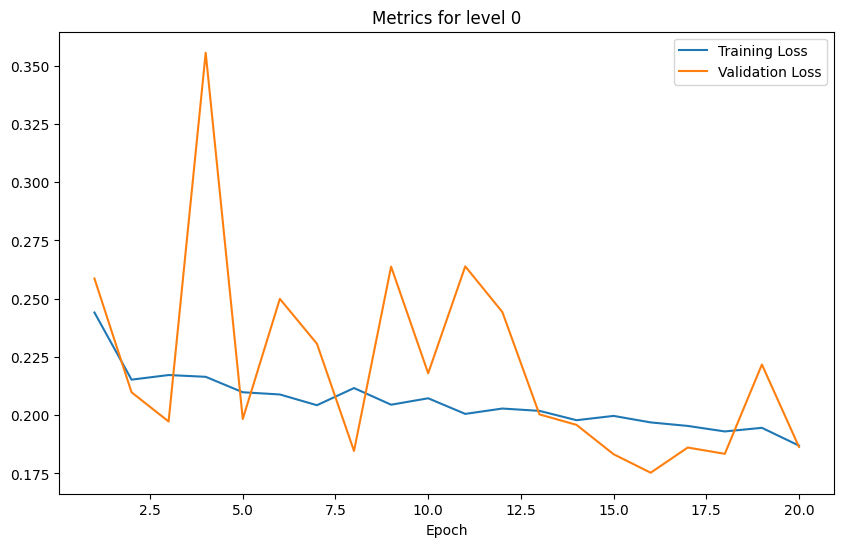

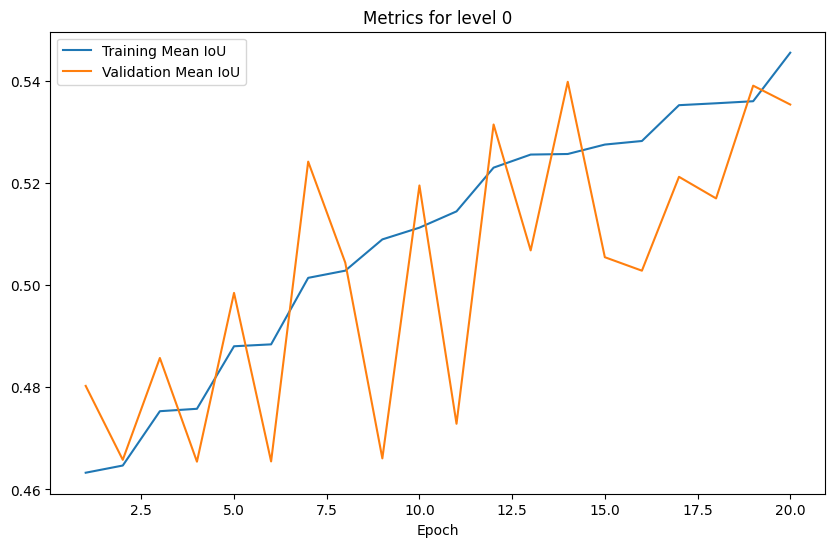

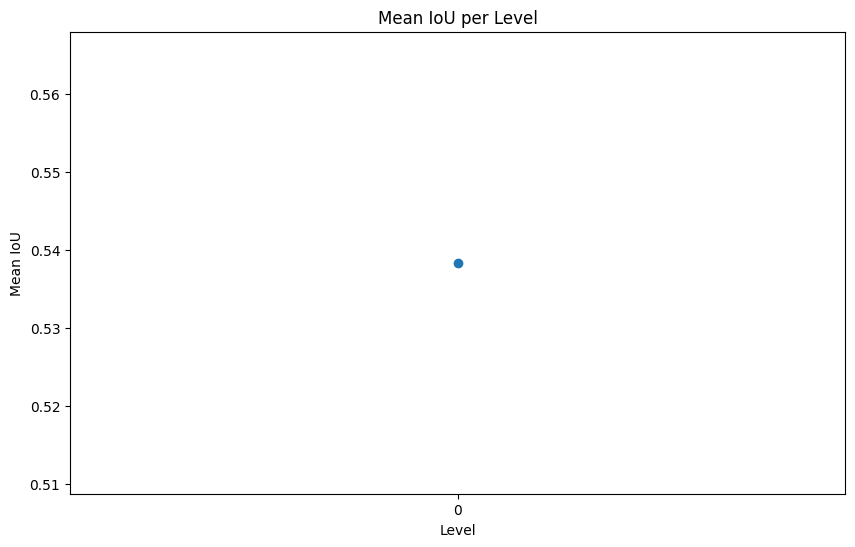

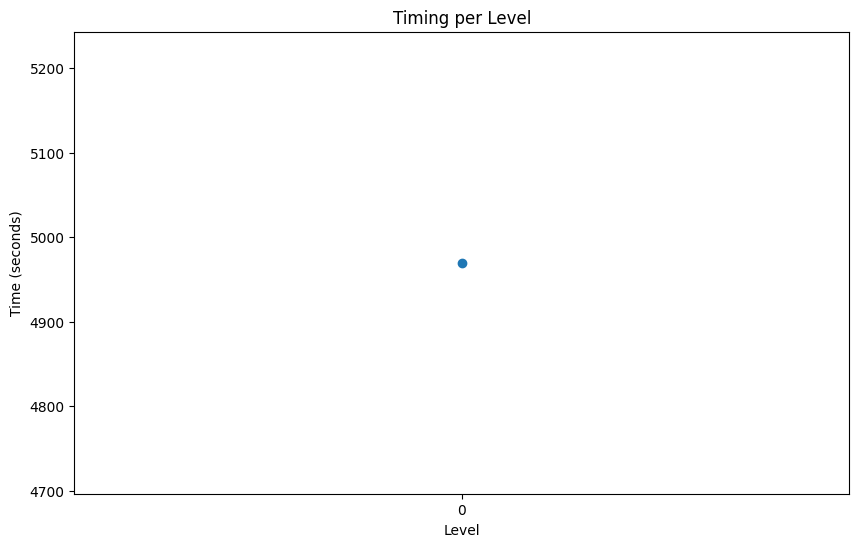

Done plotting results


In [16]:
from src.main import start_stacked_unet

start_stacked_unet(n_levels=1)

In [17]:
!zip -r output_baseline_sn6.zip output > /dev/null 2>&1


In [18]:
!cp output_baseline_sn6.zip "/content/drive/MyDrive/stacked-unet/output_baseline_sn6.zip"

In [19]:
!ls output/sn6_labels | wc -l

3153
